#### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 7
### Due: Monday, Mar 21th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on March 21th.

---

## Problem 1

**Fitting Data with MCMC**

Start with the code snipplet below to generate data.
Then, following the approach shown in `lecture_7.ipynb`, using either `emcee` or `pymc3`, fit a straight line to the data. Create the trace plots.

- Describe/ discuss where you should cut off burn-in. 
- Compute the autocorrelation length of the chain. 
- Using `corner`, make a corner plot that has labels, shows titles, and has $68\%$ and $95\%$ quantiles and levels. 








In [23]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm

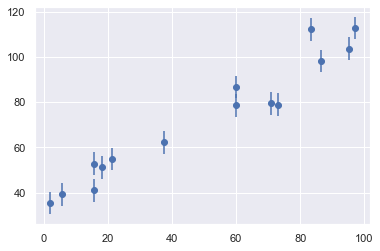

In [6]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn; seaborn.set() # for plot formatting

def make_data(intercept, slope, N=15, dy=5, rseed=42):
    rand = np.random.RandomState(rseed)
    x = 100 * rand.rand(N)
    y = intercept + slope * x
    y += dy * rand.randn(N)
    return x, y, dy * np.ones_like(x)

theta_true = (37, 0.75)
x, y, dy = make_data(*theta_true)

plt.errorbar(x, y, dy, fmt='o')


### Solution

In [35]:
with pm.Model() as model:
    # Define priors
    # mx + b
    b = pm.Normal("b", 0, sigma=20)
    m = pm.Normal("m", 0, sigma=20)

    # Define likelihood
    likelihood = pm.Normal("y", mu=b + m * x, sigma=dy, observed=y)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    trace = pm.sample(draws=12000, tune=1000, cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [m, b]


Sampling 2 chains for 1_000 tune and 12_000 draw iterations (2_000 + 24_000 draws total) took 28 seconds.
The number of effective samples is smaller than 25% for some parameters.


## Trace plots

/Users/katiecella/miniconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'b'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'m'}>,
        <AxesSubplot:title={'center':'m'}>]], dtype=object)

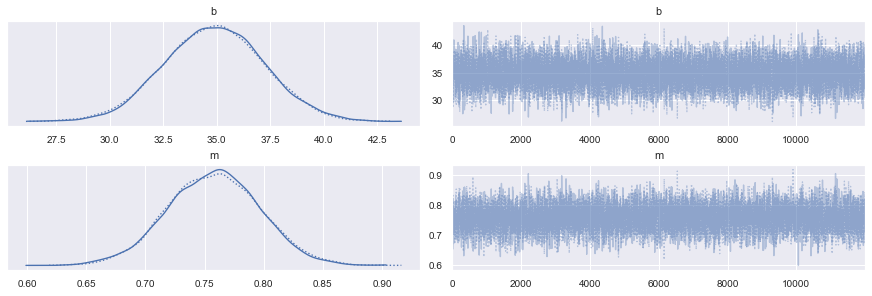

In [36]:
az.plot_trace(trace)

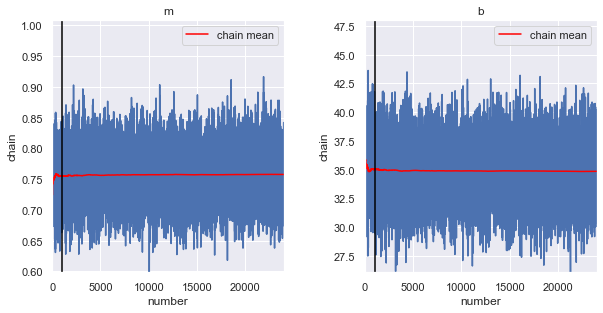

In [50]:
# plot 
fig = plt.figure(figsize=(9, 5))
fig.subplots_adjust(left=0.11, right=0.95, 
                    wspace=0.35, bottom=0.18)

chainE = trace['m']
M = np.size(chainE)

ax1 = fig.add_subplot(121)
xgrid = np.linspace(1, M, M)
plt.plot(xgrid, chainE)
ax1.axis([0, M, np.min(chainE), 1.1*np.max(chainE)])
plt.xlabel('number')
plt.ylabel('chain')

# plot running mean: 
meanC = [np.mean(chainE[:int(N)]) for N in xgrid]
ax1.plot(xgrid, meanC, c='red', label='chain mean') 
ax1.legend()
ax1.set_title("m")
ax1.axvline(1000, color='black')

chainE = trace['b']
M = np.size(chainE)

ax2 = fig.add_subplot(122)
plt.plot(xgrid, chainE)
ax2.axis([0, M, np.min(chainE), 1.1*np.max(chainE)])
plt.xlabel('number')
plt.ylabel('chain')

# plot running mean: 
meanC = [np.mean(chainE[:int(N)]) for N in xgrid]
ax2.plot(xgrid, meanC, c='red', label='chain mean') 
ax2.legend()
ax2.set_title("b")
ax2.axvline(1000, color='black')

plt.show()


A burn in of 1000 appears to cut out the beginning where it is find the correct mean value.

## Autocorrelation 

/Users/katiecella/miniconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<AxesSubplot:title={'center':'b\n0'}>,
       <AxesSubplot:title={'center':'b\n1'}>,
       <AxesSubplot:title={'center':'m\n0'}>,
       <AxesSubplot:title={'center':'m\n1'}>], dtype=object)

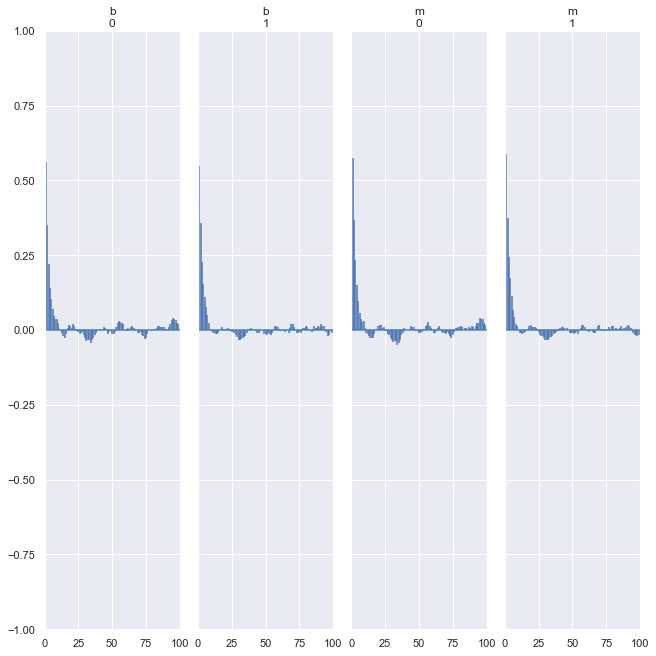

In [68]:
az.plot_autocorr(trace, figsize=(9, 9))

## Corner

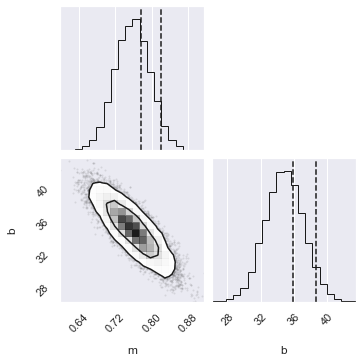

In [66]:
import corner


corner.corner(np.array([trace['m'][1000:], trace['b'][1000:]]).T, labels=['m', 'b'], 
              levels=[.68,.95], quantiles=[.68,.95])
plt.show()

## Result

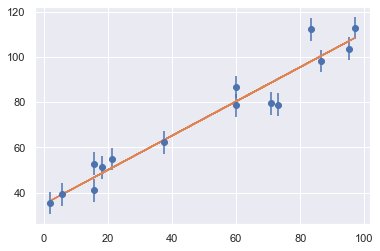

In [38]:
plt.errorbar(x, y, dy, fmt='o')
plt.plot(x, x*np.mean(trace['m']) + np.mean(trace['b']))
plt.show()